# Predictive Analytics: **Bank Customer Churn Prediction**

Predictive Analytics with *Bank Customer Churn Prediction Datasets*

Naufal Mu'afi<br>
naufalmuafi@mail.ugm.ac.id

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

%matplotlib inline

## 1. Data Loading/Data Wrangling
---

Informasi Dataset :

Jenis | Keterangan
--- | ---
Sumber | [Kaggle Dataset : Bank Customer Churn Prediction](https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction/data)
Lisensi | Other
Kategori | Finance
Rating Penggunaan | 9.71
Jenis dan Ukuran Berkas | CSV (268 kb)

In [2]:
churn = pd.read_csv("./data/Churn_Modelling.csv")
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 2. Exploratory Data Analysis (EDA)
---

### 2.1 Assesing and Cleaning Data

1. What are the types of variables in the dataset?
2. How variables distribution in the dataset?
3. Are there any missing values?
4. Are there any redundant features?
5. How about the correlation between features and targets?

#### 2.1.1 Variable Description

In [3]:
churn.shape

(10000, 14)

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
print(f"\nNumber of duplications: {churn.duplicated().sum()}")


Number of duplications: 0


#### 2.1.2 Variable Distribution Classification

before that, we can drop some unnecessary feature in the dataset

In [7]:
churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
churn.head()
churn.shape

(10000, 11)

Then, we can do a classification to the feature

In [8]:
numerical_features = []
categorical_features = []

nfeatures = len(churn.nunique())

for i in range(nfeatures):
  feature_uniqueness = churn.nunique()
  
  if feature_uniqueness.values[i] <= 25:
    categorical_features.append(feature_uniqueness.index[i])
  else:
    numerical_features.append(feature_uniqueness.index[i])

print(f"Numerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")

Numerical Features: ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
Categorical Features: ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']


#### 2.1.3 Handle Missing Value

In [9]:
churn.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### 2.1.4. Handle The Outliers

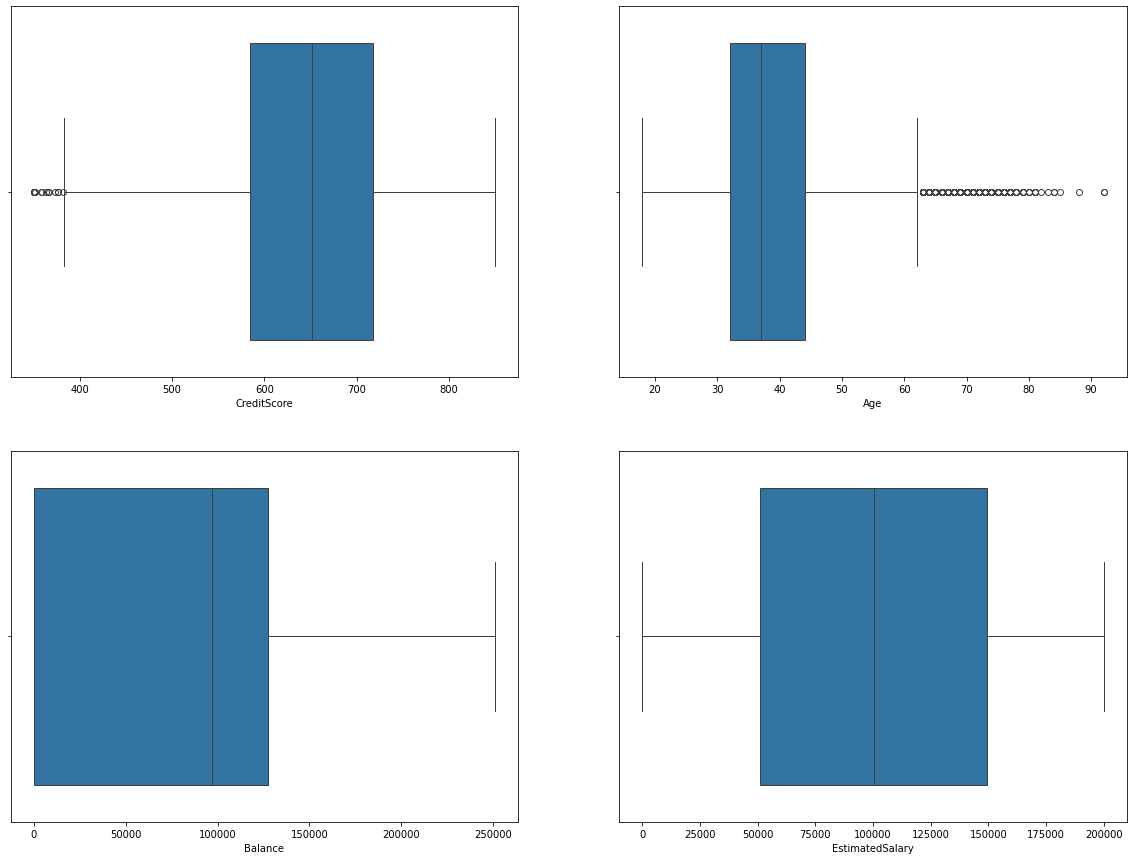

In [10]:
nrows = 2
ncols = 2

fig, ax = plt.subplots(nrows, ncols, figsize=(20, 15))

for row in range(nrows):
  for col in range(ncols):
    column = numerical_features[row*ncols + col]
    
    sns.boxplot(x=churn[column], ax=ax[row, col])    

In [15]:
Q1 = churn[numerical_features].quantile(0.25)
Q3 = churn[numerical_features].quantile(0.75)
IQR = Q3-Q1

# # creating a mask for outliers
outlier_mask = ((churn[numerical_features] < (Q1 - 1.5*IQR)) | (churn[numerical_features] > (Q3 + 1.5*IQR))).any(axis=1)

# #filtering out rows with outliers
churn = churn[~outlier_mask]

churn.shape

(9626, 11)

### 2.2 Univariate Analysis for Categorical Features

#### 2.2.1 Geography Feature